In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,62833,None,None,86085.715275
2020-06-13,62834,None,None,79940.811469
2020-06-14,62835,None,None,74244.112992
2020-06-15,62836,None,None,68878.187593
2020-06-16,62837,None,None,64137.552455
...,...,...,...,...
2021-05-27,63182,None,None,49051.570231
2021-05-28,63183,None,None,50877.742528
2021-05-29,63184,None,None,52043.447987


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-05-31_2021-05-31-19-33.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-05-30_2021-05-30-19-34.pickle


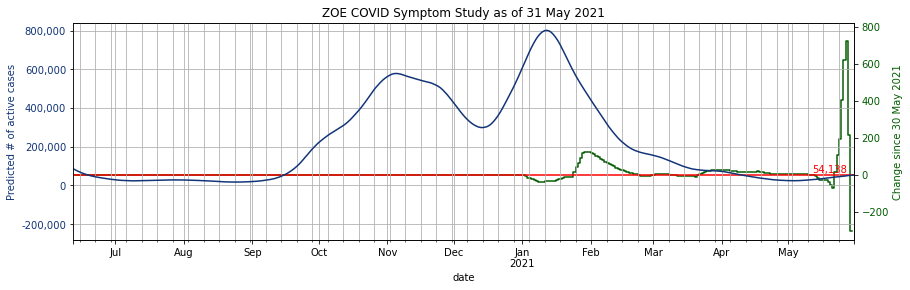

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

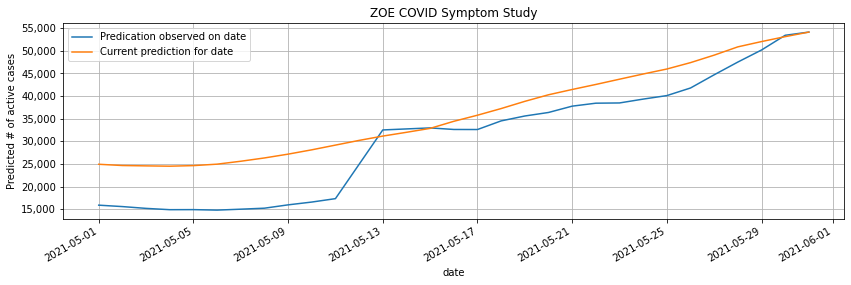

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-05-31_2021-05-31-19-33.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
272,Tameside,E08000008,1.352221
323,North Lanarkshire,S12000044,0.936247
273,Trafford,E08000009,0.676359
24,Leicester,E06000016,0.659332
279,Barnsley,E08000016,0.553771
373,North Ayrshire,S12000021,0.549400
182,West Lancashire,E07000127,0.506609
181,South Ribble,E07000126,0.411474
267,Bury,E08000002,0.404478
324,East Dunbartonshire,S12000045,0.402002
